About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the [dataset about Pokemons](https://www.kaggle.com/datasets/abcsds/pokemon)

In [ ]:
df = pd.read_csv('Pokemon.csv')
df.sample(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
285,262,Mightyena,Dark,NaN,420,70,90,70,60,60,70,3,False
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
450,405,Luxray,Electric,NaN,523,80,120,79,95,79,70,4,False
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True


# Task 1 (1 point)

Investigate  the type of every feature. Is it numerical or cetegorical (nominal or ordinal)? Explain, why.

You may need to check the type of the column or consult the description of the data on Kaggle.com

In [ ]:
#YOUR CODE

# Investigating the data types of each column

df.dtypes


#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

**Answer** \#YOUR ANSWER
type 1 = categorical, type 2= categorical




# Task 2 (1 point)

It is said in the description of the dataset that `Total` is the sum of the stats after it. Let's check, if it is true.

Create a new column `'New Total'`, what is the sum of `HP, 	Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed`

In [ ]:
#YOUR CODE

# Creating the 'New Total' column by summing individual stat columns

df['New Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Filtering rows where 'Total' and 'New Total' are different

mismatch = df[df['Total'] != df['New Total']]


Now, print the number of rows that contain deifferent   `'Total'` and `'New Total'` values and depict these rows.

Hint: compare columns `'Total'` and `'New Total'` and filter rows using the comparison.


In [ ]:
#YOUR CODE

# Displaying the number of mismatches and the mismatched rows

mismatch_count = mismatch.shape[0]
mismatch_count, mismatch

(0,
 Empty DataFrame
 Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, New Total]
 Index: [])

# Task 3 (2 points)

Create a frequency table for the `'Type 1'` feature

In [ ]:
#YOUR CODE

# Creating a frequency table for 'Type 1'
type1_freq = df['Type 1'].value_counts().to_frame(name='Frequency')



Also, add proportions and percentage for every type  to the table.

Hint: `Series.to_frame` may be a useful function

In [ ]:
#YOUR CODE

# Adding proportions and percentages
type1_freq['Proportion'] = type1_freq['Frequency'] / len(df)
type1_freq['Percentage'] = type1_freq['Proportion'] * 100

# Displaying the table
type1_freq.head()


,Frequency,Proportion,Percentage
Type 1,,,
Water,112,0.14000,14.000
Normal,98,0.12250,12.250
Grass,70,0.08750,8.750
Bug,69,0.08625,8.625
Psychic,57,0.07125,7.125


Draw a plot to depict the percentage. Make sure to make labels/ticks readable.

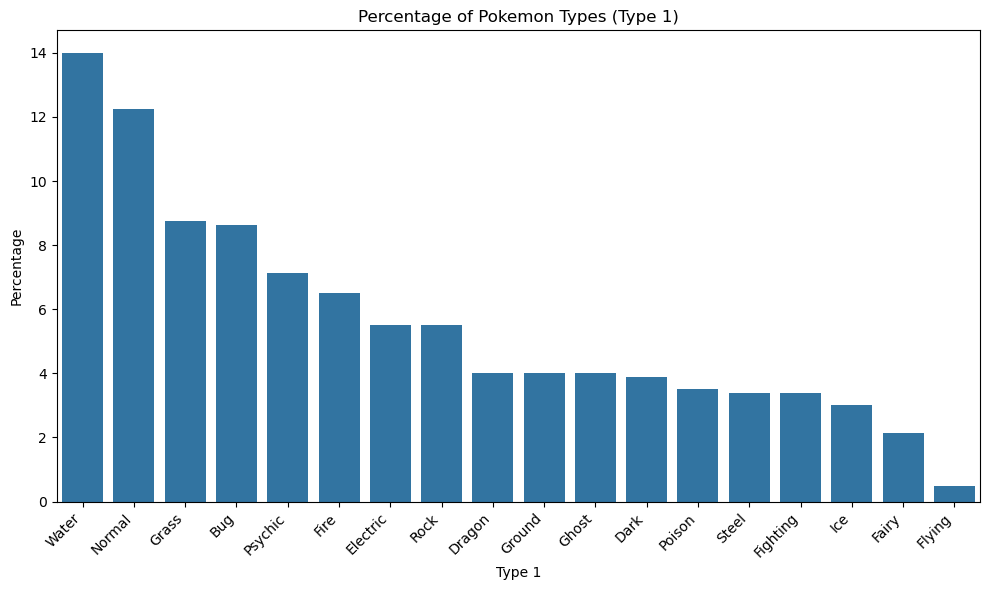

In [ ]:
#YOUR CODE

# Plotting the percentages for 'Type 1'
plt.figure(figsize=(10, 6))
sns.barplot(x=type1_freq.index, y=type1_freq['Percentage'])

# Adjusting the plot for readability
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title('Percentage of Pokemon Types (Type 1)')
plt.tight_layout()
plt.show()


Draw conclusions from the plot. (Are there a lot of differnet types? What is the most/least popular type? ...)

**Answer** \#YOUR answer
the most popular type is water and the least popular type is flying

# Task 4 (2 points)

Compue the measures of central tendency for the `Sp. Atk` feature

In [ ]:
col = 'Sp. Atk'

# Calculating mean, median, and mode
mean_value = df[col].mean()
median_value = df[col].median()
mode_value = df[col].mode()[0]

mean_value, median_value, mode_value


(72.82, 65.0, 60)

Draw a histogram for the feature and depict the measures on it

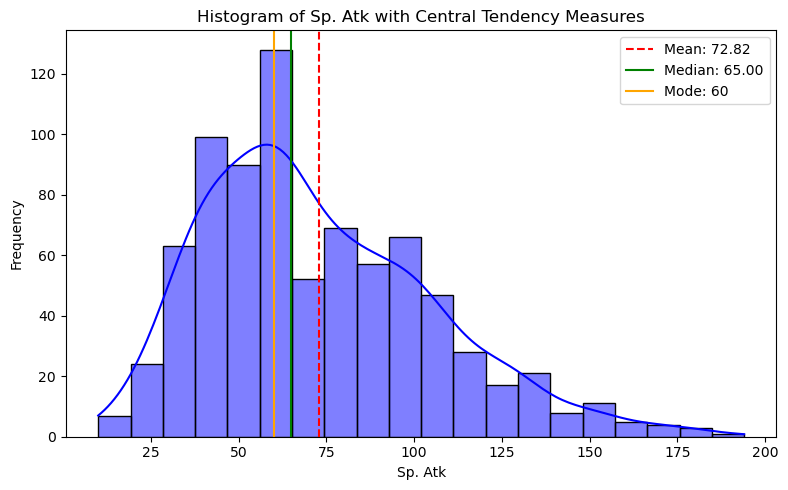

In [ ]:
#YOUR CODE

# Plotting the histogram for 'Sp. Atk'
plt.figure(figsize=(8, 5))
sns.histplot(df[col], kde=True, color='blue', bins=20)

# Depicting the measures of central tendency
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='orange', linestyle='-', label=f'Mode: {mode_value}')

plt.legend()
plt.title(f'Histogram of {col} with Central Tendency Measures')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Is the distribution skewed? Explain your answer.

**Answer** \#YOUR ANSWER
wards. the distribution is skewed to the right. the majority of the data can be located at the left side of the graph. the meanis also greater thn median.

# Task 5 (2 point)

Now, compute measures of central tendencies for legendary and not legendary separately. Is there any difference?

In [ ]:
#YOUR CODE

# Separating the data into Legendary and Non-Legendary Pokémon
legendary = df[df['Legendary'] == True]
non_legendary = df[df['Legendary'] == False]

# Computing central tendency measures for Sp. Atk
legendary_stats = legendary['Sp. Atk'].agg(['mean', 'median'])
non_legendary_stats = non_legendary['Sp. Atk'].agg(['mean', 'median'])

# Printing the results
legendary_stats, non_legendary_stats


(mean      122.184615
 median    120.000000
 Name: Sp. Atk, dtype: float64,
 mean      68.454422
 median    65.000000
 Name: Sp. Atk, dtype: float64)

**Answer** \#YOUR ANSWER

ned to be stronger.

Draw the hisograms on one plot.

Hint: use `hue` in `sns.histplot`

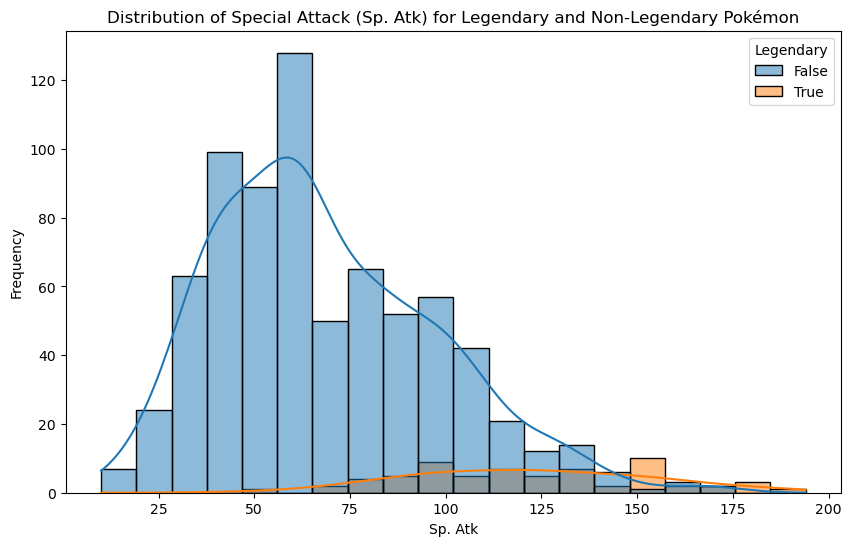

In [ ]:
#YOUR CODE

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for both groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sp. Atk', hue='Legendary', kde=True, bins=20)

# Adding titles and labels
plt.title('Distribution of Special Attack (Sp. Atk) for Legendary and Non-Legendary Pokémon')
plt.xlabel('Sp. Atk')
plt.ylabel('Frequency')
plt.show()


# Task 6 (2 point)

There is a problem that bars for legendary pokemons are significantly smaller than the bars for non-legendary. Explain, why is it happening

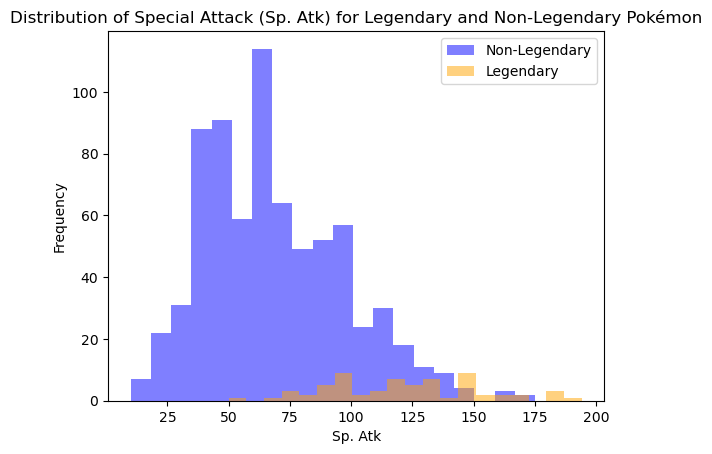

In [ ]:
#YOUR CODE

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataset, with 'Sp. Atk' and 'Legendary' as columns
legendary = df[df['Legendary'] == True]['Sp. Atk']
non_legendary = df[df['Legendary'] == False]['Sp. Atk']

# Plotting histograms without normalization
plt.hist(non_legendary, bins=20, alpha=0.5, label='Non-Legendary', color='blue')
plt.hist(legendary, bins=20, alpha=0.5, label='Legendary', color='orange')

# Adding labels and legend
plt.legend()
plt.title('Distribution of Special Attack (Sp. Atk) for Legendary and Non-Legendary Pokémon')
plt.xlabel('Sp. Atk')
plt.ylabel('Frequency')
plt.show()

**Answer** \#YOUR ANSWER

pret.  the non legendary pokeman has high data or a larger data set as compared to the legendary pokemonn.


Fix the histogram (make the bars comparable hights), so it wil be more convenient to compare the distributions.

Hint: consult the [documentation for the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) and find, which optional arguments may help.

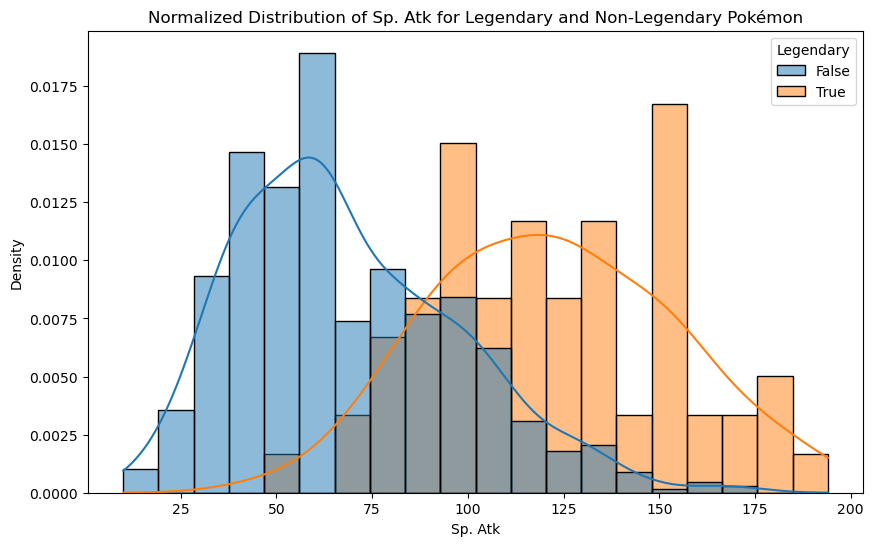

In [ ]:
#YOUR CODE

# Fixing the histogram by normalizing (density=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sp. Atk', hue='Legendary', kde=True, bins=20, stat='density', common_norm=False)

# Adding titles and labels
plt.title('Normalized Distribution of Sp. Atk for Legendary and Non-Legendary Pokémon')
plt.xlabel('Sp. Atk')
plt.ylabel('Density')
plt.show()


Now, make conclusions about the distributions

**Answer** \#YOUR ANSWER

tats in this aspect.A normalization has been done so that each bars height show a probability, proportion or percent which makes more sense for discrete variables.